<a href="https://colab.research.google.com/github/ShahidHasib586/MIR-Deep-learning/blob/main/Segmentation/Questions_TP_horizon_segmentation_MIR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deep Learning Lab Assignment: Building a U-Net for Image Segmentation
Objective

The goal of this lab is to design and implement a U-Net neural network for image segmentation. The network will process infrared images captured by a camera mounted on an autonomous drone boat. The purpose of the segmentation task is to distinguish the sea from the sky. This segmentation will serve two primary purposes:  

*   Filtering out detections located in the sky.
*    Calculating the distance of a detection relative to the camera based on its distance from the horizon.
   

# Problem Context

Autonomous drone boats rely on visual data to make navigation and detection decisions. Infrared cameras are particularly useful in low-light or challenging environments, such as at night or during foggy conditions. However, to ensure accurate analysis, it is essential to segment the images to separate the sea from the sky.

In this lab, you will build and train a U-Net, a convolutional neural network architecture specifically designed for image segmentation tasks. The U-Net will label each pixel in the image as either "sea" or "sky." The resulting segmentation map will be used for filtering out false detections in the sky and estimating distances based on the location of the horizon.




# Exercise instructions
1.  You must answer the questions at the beginning of each paragraph  
2.  You must complete the code between #...#
3.  You must explain in comments the lines of code that you produce
4.  You can help and ask for help from others but you must indicate the person who helped you

# Deliverables

1.   Python code for your U-Net implementation.
2.   The trained model (saved as a file)
3.   A report summarizing your findings and results ( plot evaluation loss, train loss and accuracy metric)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
'''import os
from zipfile import ZipFile

# List of ZIP files
zip_files = ['/content/drive/MyDrive/MIR/train_frames-20250112T192858Z-001.zip', '/content/drive/MyDrive/MIR/train_masks-20250112T192152Z-001.zip', '/content/drive/MyDrive/MIR/val_frames-20250112T193230Z-001.zip', '/content/drive/MyDrive/MIR/val_masks-20250112T193113Z-001.zip', '/content/drive/MyDrive/MIR/test_frames-20250112T193440Z-001.zip', '/content/drive/MyDrive/MIR/test_masks-20250112T193603Z-001.zip']  # Replace with your ZIP file names

# Destination folder for unzipped files
base_destination = '/content/MIR/datasets'

# Create the base destination folder if it doesn't exist
os.makedirs(base_destination, exist_ok=True)

# Loop through the ZIP files and extract each
for zip_file in zip_files:
    destination = os.path.join(base_destination, os.path.splitext(zip_file)[0])  # Folder named after the ZIP file
    os.makedirs(destination, exist_ok=True)  # Ensure the folder exists
    with ZipFile(zip_file, 'r') as zip_ref:
        zip_ref.extractall(destination)  # Extract to the specific folder
    print(f"Extracted {zip_file} to {destination}")

# List all folders created
print("Unzipped folders:")
print(os.listdir(base_destination))'''


'import os\nfrom zipfile import ZipFile\n\n# List of ZIP files\nzip_files = [\'/content/drive/MyDrive/MIR/train_frames-20250112T192858Z-001.zip\', \'/content/drive/MyDrive/MIR/train_masks-20250112T192152Z-001.zip\', \'/content/drive/MyDrive/MIR/val_frames-20250112T193230Z-001.zip\', \'/content/drive/MyDrive/MIR/val_masks-20250112T193113Z-001.zip\', \'/content/drive/MyDrive/MIR/test_frames-20250112T193440Z-001.zip\', \'/content/drive/MyDrive/MIR/test_masks-20250112T193603Z-001.zip\']  # Replace with your ZIP file names\n\n# Destination folder for unzipped files\nbase_destination = \'/content/MIR/datasets\'\n\n# Create the base destination folder if it doesn\'t exist\nos.makedirs(base_destination, exist_ok=True)\n\n# Loop through the ZIP files and extract each\nfor zip_file in zip_files:\n    destination = os.path.join(base_destination, os.path.splitext(zip_file)[0])  # Folder named after the ZIP file\n    os.makedirs(destination, exist_ok=True)  # Ensure the folder exists\n    with ZipF

In [ ]:
import os
project_path = "/content/drive/MyDrive/Colab Notebooks/Deep Learning Arnaud Pietrosemoli/HorizonSegmentation/"
data_set_path = "/content/drive/MyDrive/MIR/"
TRAIN_IMG_DIR = os.path.join(data_set_path,"train_frames-20250112T192858Z-001/train_frames/train")
TRAIN_MASK_DIR = os.path.join(data_set_path,"train_masks-20250112T192152Z-001/train_masks/train")
VAL_IMG_DIR = os.path.join(data_set_path,"val_frames-20250112T193230Z-001/val_frames/val")
VAL_MASK_DIR = os.path.join(data_set_path,"val_masks-20250112T193113Z-001/val_masks/val")
CHECKPOINT_PATH = os.path.join(project_path,"Save/my_checkpoint.pth.tar")
PLOT_PATH = os.path.join(project_path,"Save/Accuracy")
PLOT_VAL_PATH = os.path.join(project_path,"Save/validation")


# Dataset
https://pytorch.org/tutorials/beginner/basics/data_tutorial.html

In [ ]:
import os
from PIL import Image
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
import numpy as np
import pdb

## Dataset Class
Questions:
1. Explain what the get_item function is for and how it is called in training mechanism?
2. why do we have to divide mask by 255?


In [ ]:
import os
from torch.utils.data import Dataset
from PIL import Image
import numpy as np

class HorizonDataset(Dataset):
    def __init__(self, image_dir, mask_dir, transform=None):
        self.image_dir = image_dir
        self.mask_dir = mask_dir
        self.transform = transform
        self.images = os.listdir(image_dir)

    def __len__(self):
        return len(self.images)

# Create a HorizonDataset class that derives from the pytorch Dataset class and complete the __getitem__(self, index) method.
    def __getitem__(self, index):
        img_path = os.path.join(self.image_dir, self.images[index])
        mask_path = os.path.join(self.mask_dir, self.images[index])

        # Open the image and mask using PIL
        image = Image.open(img_path).convert("RGB")  # Convert image to RGB format
        mask = Image.open(mask_path).convert("L")   # Convert mask to grayscale

        # Convert to numpy arrays
        image = np.array(image, dtype=np.float32)
        mask = np.array(mask, dtype=np.float32)

        # Normalize the mask values to [0, 1]
        mask = mask / 255.0

        # Apply augmentations (if any)
        if self.transform is not None:
            augmentations = self.transform(image=image, mask=mask)
            image = augmentations["image"]
            mask = augmentations["mask"]

        return (image, mask)


## Loader definition
Questions:
1. Explain what the data loader is for?

In [ ]:
# The data loader allows you to iterate over the dataset.
# Each iteration below returns a batch of train_features and train_labels

def get_loaders(
    train_dir,
    train_maskdir,
    val_dir,
    val_maskdir,
    batch_size,
    train_transform,
    val_transform,
    num_workers=4,
    pin_memory=True,
):
    train_ds = HorizonDataset(
        image_dir=train_dir,
        mask_dir=train_maskdir,
        transform=train_transform,
    )

# Warning to shuffle (true or false ??? explain why in commentary)
# for training shuffel should be true in this case, we shaffle the training set to reduce Bias in training, to improve Gradient Descent efficiency, to avoid temporal or positional correlations, it also ensures better generalization in the training set. However, if we are working with time series data we wont shaffel as it will destroy the specific pettern.
    train_loader =  DataLoader(train_ds, shuffle=True,
                               batch_size=batch_size,
                               pin_memory = pin_memory ,num_workers=num_workers)

    val_ds = HorizonDataset(
        image_dir=val_dir,
        mask_dir=val_maskdir,
        transform=val_transform,
    )
# Warning to shuffle (true or false ??? explain why in commentary)
# We dont shaffle the Validation and testing datasets. These data should not be shuffled to maintain consistency in evaluation. we also don't do that for the time series data: If the order of data has temporal significance, shuffling might destroy important patterns. Use sequence-specific techniques in such cases.
    val_loader = DataLoader(val_ds, shuffle=False,
	  batch_size=batch_size, pin_memory=pin_memory,
	  num_workers=num_workers)

    return train_loader, val_loader

# Model definition
https://www.pinecone.io/learn/batch-layer-normalization/

https://medium.com/data-science-365/batch-normalization-explained-in-plain-english-3436014f9e52

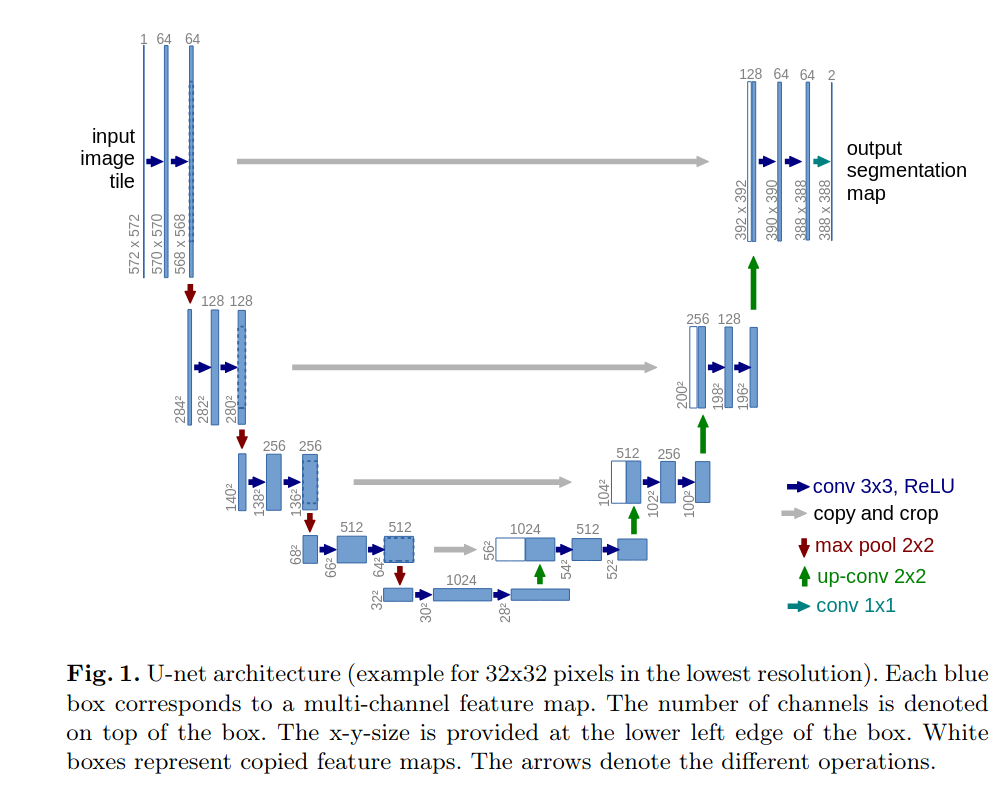

In [ ]:
import torch
import torch.nn as nn
import torchvision.transforms.functional as TF

# explain the line of code below
#The code belolow will look for GPU if it finds a GPU it will run the code using GPU otherwise it will run the code on CPU
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"

## Double convolution
Questions:
1. From the network diagram above, code an elementary brick composed of a convolution layer.Do the same but limiting to a single convolution layer.

In [ ]:
 #Conv2d -> BatchNorm2d -> ReLU -> Conv2d -> BatchNorm2d ->  ReLU#
class DoubleConv(nn.Module):
    def __init__(self, in_channels, out_channels):
        super(DoubleConv, self).__init__()
        self.conv = nn.Sequential(
            nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1),
            nn.BatchNorm2d(out_channels),
            nn.ReLU(inplace=True),
            nn.Conv2d(out_channels, out_channels, kernel_size=3, padding=1),
            nn.BatchNorm2d(out_channels),
            nn.ReLU(inplace=True)
        )

    def forward(self, x):
        return self.conv(x)

In [ ]:
# The same but with only one sequence
class SingleConv(nn.Module):
    def __init__(self, in_channels, out_channels):
        super(SingleConv, self).__init__()
        self.conv = nn.Sequential(
            nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1),
            nn.BatchNorm2d(out_channels),
            nn.ReLU(inplace=True)
        )

    def forward(self, x):
        return self.conv(x)


## Model
https://arxiv.org/pdf/1505.04597.pdf

Questions :
1.  Complete the model code from the publication schema.
2.  Complete the descending part then the rising part of the Unet.
3.  For the rising part, use ConvTranspose2d
4.  Use the DoubleConv function first and then the SimpleConv, make comments

In [ ]:
import torch.nn as nn

class UNET(nn.Module):
    def __init__(self, in_channels=3, out_channels=1, features=[64, 128, 256, 512]):
        super(UNET, self).__init__()
        self.ups = nn.ModuleList()
        self.downs = nn.ModuleList()
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)

        # Down part of UNET
        for feature in features:
            self.downs.append(DoubleConv(in_channels, feature))
            in_channels = feature

        # Up part of UNET
        for feature in reversed(features):
            self.ups.append(
                nn.ConvTranspose2d(feature * 2, feature, kernel_size=2, stride=2)
            )
            self.ups.append(DoubleConv(feature * 2, feature))

        # Bottleneck
        self.bottleneck = SingleConv(features[-1], features[-1] * 2)

        # Final Convolution
        self.final_conv = nn.Conv2d(features[0], out_channels, kernel_size=1)

    def forward(self, x):
        skip_connections = []

        for down in self.downs:
            x = down(x)
            skip_connections.append(x)
            x = self.pool(x)

        x = self.bottleneck(x)
        skip_connections = skip_connections[::-1]

        for idx in range(0, len(self.ups), 2):
            x = self.ups[idx](x)
            skip_connection = skip_connections[idx // 2]

            if x.shape != skip_connection.shape:
                x = TF.resize(x, size=skip_connection.shape[2:])

            concat_skip = torch.cat((skip_connection, x), dim=1)
            x = self.ups[idx + 1](concat_skip)

        return self.final_conv(x)

# Evaluation metric
Evaluation metrics are quantitative measures used to assess the performance and effectiveness of a statistical or machine learning model. These metrics provide insights into how well the model is performing and help in comparing different models or algorithms.

https://www.analyticsvidhya.com/blog/2019/08/11-important-model-evaluation-error-metrics/

Q: Write a function which calculates the accuracy which is the number of pixels OK compared to the total number of pixels and which calculates the dice score. This function will return the dice score as a validation metric.
Comment on the use of model.eval() and model.train()

In [ ]:
def check_accuracy(loader, model, device="cuda"):
    num_correct = 0
    num_pixels = 0
    dice_score = 0
    model.eval()  # put the model in evaluation mode

    '#TODO'
    # Use torch.no_grad() to disable gradient tracking during validation
    with torch.no_grad():
        for x, y in loader:
            x, y = x.to(device), y.to(device)

            # Make predictions using the model
            preds = model(x)

            # Convert predictions to a binary mask (thresholding)
            preds = torch.sigmoid(preds)  # Apply sigmoid activation to get probabilities
            preds = (preds > 0.5).float()  # Thresholding: values > 0.5 become 1, else 0

            # As 'y' is a single-channel binary mask
            if y.shape[-1] == 3:
                y = y[..., 0].unsqueeze(1)  # Take the first channel and add the channel dimension

            # Calculate evaluation metrics (Dice coefficient and accuracy)
            num_correct += (preds == y).sum()  # Count the number of correct pixels
            num_pixels += torch.numel(preds)  # Count the total number of pixels
            dice_score += (2 * (preds * y).sum()) / ((preds + y).sum() + 1e-8) # Add 1e-8 to avoid division by zero

    # Calculate validation accuracy (Dice coefficient) over the entire validation dataset
    val_accuracy = dice_score / len(loader)
    '#TODO'

    print(
        f"Got {num_correct}/{num_pixels} with acc {num_correct/num_pixels:.2f}%"
    )
    print(f"Dice score: {val_accuracy}")
    model.train()  # put the model back in training mode

    return val_accuracy

# Training
https://www.analyticsvidhya.com/blog/2023/01/gradient-descent-vs-backpropagation-whats-the-difference/

In [ ]:
import torch
import albumentations as A
from albumentations.pytorch import ToTensorV2
from tqdm import tqdm
import torch.nn as nn
import torch.optim as optim
from torch.optim import SGD
from torch.optim.lr_scheduler import ReduceLROnPlateau

DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
NUM_WORKERS = 2
IMAGE_HEIGHT = 128  # 1280 originally
IMAGE_WIDTH = 256  # 1918 originally
PIN_MEMORY = True
LOAD_MODEL = False

## Hyper parameters

In [ ]:
class HyperParameters:
    def __init__(self, learning_rate, batch_size, epoch_numbers, device="cuda"):
        self.learning_rate = learning_rate
        self.batch_size = batch_size
        self.epoch_numbers = epoch_numbers
        self.device = device  # Added device as an attribute


## Train function
Qestions
1. Write a function that calculates the loss on validation data.
2. Write a function that saves an image and the network prediction for each epoch to visualize the learning progress.
3. Write a function that calculates the loss on training data.
4. Make a comment on optimizer.zero_grad(), scaler.scale(loss).backward(),scaler.step(optimizer), scaler.update()


In [ ]:
def check_val_loss(loader, model, loss_fn, device="cuda"):
    totalValLoss = 0.0
    model.eval()  # Set the model to evaluation mode to disable certain layers like dropout and batch normalization during inference.

    with torch.no_grad():
        for data, targets in loader:
            data, targets = data.to(device), targets.float().unsqueeze(1).to(device)  # Move input data and targets to the specified device (GPU or CPU).
            outputs = model(data)  # Perform inference to obtain model predictions.
            loss = loss_fn(outputs, targets)  # Calculate the loss between predictions and ground truth targets.
            totalValLoss += loss.item()  # Accumulate the validation loss for all batches.

    val_loss = totalValLoss / len(loader)  # Calculate the average validation loss over the entire validation dataset.

    print(f"Val loss: {val_loss}")
    model.train()  # Set the model back to training mode with enabled layers like dropout and batch normalization.

    return val_loss

def save_eval(loader, model, epoch, file_path="eval_image", device="cuda"):

    model.eval()  # Set the model to evaluation mode to disable certain layers like dropout and batch normalization during inference.

    with torch.no_grad():
        val_images, val_masks = next(iter(loader))  # Get a batch of validation images and masks.
        val_images = val_images.to(device)  # Move validation images to the specified device (GPU or CPU).
        filename = file_path + "_" + str(epoch)
        predictions = model(val_images)  # Obtain model predictions (logits).
        preds = torch.sigmoid(predictions)  # Apply sigmoid activation to obtain probability maps.

        # Extract individual numpy arrays for visualization.
        image = val_images[0][0].cpu().numpy()  # Extract the first image from the batch.
        mask = val_masks[0].cpu().numpy()  # Extract the corresponding ground truth mask.
        pred_mask = preds[0, 0, :, :].cpu().numpy()  # Extract the predicted mask from the probability map.

        # Create subplots to visualize the original image, ground truth, and predicted mask.
        fig, axs = plt.subplots(1, 3, figsize=(10, 3))
        axs[0].imshow(image, cmap='gray')
        axs[0].set_title('Image')
        axs[1].imshow(mask, cmap='gray')
        axs[1].set_title('Base Mask')
        axs[2].imshow(pred_mask, cmap='gray')
        axs[2].set_title('Predicted Mask')

        # Add a title to the entire figure.
        fig.suptitle(f'Image, Base Mask, and Predicted Mask for epoch: {epoch}')

        # Save the figure as an image file.
        plt.savefig(f"{filename}_sample.png")
        plt.close()
        # This code extracts a single image and its corresponding mask from the data loader, feeds it through the model to obtain predictions,
        # and then visualizes the original image, ground truth mask, and predicted mask using matplotlib.

    model.train()  # Set the model back to training mode with enabled layers like dropout and batch normalization.


In [ ]:
from tqdm import tqdm

def train_fn(loader, model, optimizer, loss_fn, scaler):
    loop = tqdm(loader, total=len(loader), unit="batch")
    totalTrainLoss = 0.0

    # Loop through batches of data and targets
    for batch_idx, (data, targets) in enumerate(loop):
        # Move data and targets to the specified device (usually GPU)
        data = data.to(device=DEVICE)
        targets = targets.to(device=DEVICE).unsqueeze(1)

        # Perform forward pass through the neural network model
        with torch.cuda.amp.autocast():
            predictions = model(data)  # Get model predictions for the batch
            loss = loss_fn(predictions, targets)  # Calculate the loss for this batch
            totalTrainLoss += loss  # Accumulate the total training loss

        # Backward pass and optimization
        optimizer.zero_grad()  # Clear any previous gradients before backpropagation
        scaler.scale(loss).backward()  # Scale the loss to avoid gradient underflow and perform backpropagation
        scaler.step(optimizer)  # Update model weights using the optimizer
        scaler.update()  # Update the gradient scaler for dynamic loss scaling

        # Update the progress bar (tqdm loop) to display the current loss
        loop.set_postfix(loss=loss.item(), refresh=False)
        loop.update()

    loop.close()  # Close the tqdm loop

    train_loss = totalTrainLoss/len(loader)
    print(f"Train loss: {train_loss}")

    return train_loss

## Training script
Questions:
1. Write a function wich plot and save train_loss, val_loss and val_acc
2. Write a function which save ckeckpoint file
3. Make a comment on:
A.Resize(height=IMAGE_HEIGHT, width=IMAGE_WIDTH),
            A.Rotate(limit=35, p=1.0),
            A.HorizontalFlip(p=0.5),
            A.VerticalFlip(p=0.1),
            A.Normalize(
                mean=[0.0],
                std=[1.0],
                max_pixel_value=255.0,
            )
4.  Why are transformations missing for validation data?
5.  Why  nn.BCEWithLogitsLoss() is used instead of classical BCE?
6.  Make a comment on: torch.cuda.amp.GradScaler()
7.  What is Adam? What’s the main difference between Adam and SGD?

In [ ]:
import matplotlib.pyplot as plt
from torchvision.io import read_image

class Results:
    def __init__(self, file_path="results"):
        self.result_dict = {
            "train_loss": [],
            "val_loss": [],
            "val_acc": []
        }
        self.path = file_path

    def add_result(self, train_loss, val_loss, val_acc):
        self.result_dict["train_loss"].append(train_loss)
        self.result_dict["val_loss"].append(val_loss)
        self.result_dict["val_acc"].append(val_acc)

    def plotAndSave(self, n_epoch):
        filename = self.path + "_" + str(n_epoch)
        plt.figure(figsize=(10, 4))

        # Ensure each element in the lists is a PyTorch tensor, detach, and move to CPU
        train_loss_cpu = [tensor.detach().cpu().numpy() if isinstance(tensor, torch.Tensor) else tensor for tensor in self.result_dict["train_loss"]]
        val_loss_cpu = [tensor.detach().cpu().numpy() if isinstance(tensor, torch.Tensor) else tensor for tensor in self.result_dict["val_loss"]]
        val_acc_cpu = [tensor.detach().cpu().numpy() if isinstance(tensor, torch.Tensor) else tensor for tensor in self.result_dict["val_acc"]]

        plt.subplot(1, 3, 1)
        plt.plot(np.arange(n_epoch + 1), train_loss_cpu, label='Train Loss')
        plt.title('Train Loss')

        plt.subplot(1, 3, 2)
        plt.plot(np.arange(n_epoch + 1), val_loss_cpu, label='Validation Loss')
        plt.title('Validation Loss')

        plt.subplot(1, 3, 3)
        plt.plot(np.arange(n_epoch + 1), val_acc_cpu, label='Validation Accuracy')
        plt.title('Validation Accuracy')

        plt.legend()
        plt.savefig(f'{filename}.png')
        plt.show()

In [ ]:
def save_checkpoint(state, filename="my_checkpoint.pth.tar"):
    print("=> Saving checkpoint: ")
    print(filename)
    torch.save(state, filename)

# Define a function to load a checkpoint and update the model's state.
def load_checkpoint(checkpoint, model):
    print("=> Loading checkpoint")
    model.load_state_dict(checkpoint["state_dict"])

# Define the main training function, which takes hyperparameters as input.
def run_training(hyper_parameters):
    # Create an object to store and visualize training results.
    results = Results(file_path=PLOT_PATH)

    # Define data augmentation transformations for training images.
    train_transform = A.Compose([
        A.Resize(height=IMAGE_HEIGHT, width=IMAGE_WIDTH),  # Resize images to a fixed size
        A.Rotate(limit=35, p=1.0),  # Randomly rotate images
        A.HorizontalFlip(p=0.5),  # Randomly flip images horizontally
        A.VerticalFlip(p=0.1),  # Randomly flip images vertically
        A.Normalize(
            mean=[0.0],
            std=[1.0],
            max_pixel_value=255.0,
        ),  # Normalize images with mean and standard deviation
        ToTensorV2(),  # Convert images to tensors
    ])

    # Define data augmentation transformations for validation images.
    val_transforms = A.Compose([
        A.Resize(height=IMAGE_HEIGHT, width=IMAGE_WIDTH),  # Resize images to a fixed size
        A.Normalize(
            mean=[0.0],
            std=[1.0],
            max_pixel_value=255.0,
        ),  # Normalize images with mean and standard deviation
        ToTensorV2(),  # Convert images to tensors
    ])

#     # Create an instance of the UNET model and move it to the specified device (usually GPU).
#     model = UNET().to(DEVICE)
#     # Define the loss function for training.
#     loss_fn = nn.BCEWithLogitsLoss()
#     # Define the optimizer (Adam) with the specified learning rate.
#     optimizer = optim.Adam(model.parameters(), lr=hyper_parameters.learning_rate)


    model = UNET(in_channels=3, out_channels=1).to(device=DEVICE)
    loss_fn = nn.BCEWithLogitsLoss()
    optimizer = SGD(model.parameters(), lr=0.01, momentum=0.9)
    scheduler = ReduceLROnPlateau(optimizer, mode='min', patience=3, factor=0.5, verbose=True)

    # Create data loaders for training and validation datasets.
    train_loader, val_loader = get_loaders(
        TRAIN_IMG_DIR,
        TRAIN_MASK_DIR,
        VAL_IMG_DIR,
        VAL_MASK_DIR,
        hyper_parameters.batch_size,
        train_transform,
        val_transforms,
        NUM_WORKERS,
        PIN_MEMORY,
    )

    # If a saved model checkpoint exists, load it.
    if LOAD_MODEL:
        load_checkpoint(torch.load("my_checkpoint.pth.tar"), model)

    # Check the accuracy of the model on the validation dataset.
    check_accuracy(val_loader, model, device=DEVICE)

    # Create a gradient scaler for mixed-precision training (used later in the loop).
    scaler = torch.cuda.amp.GradScaler()

    # Loop through training epochs.
    for epoch in range(hyper_parameters.epoch_numbers):
        # Train the model for one epoch and calculate the training loss.
        train_loss = train_fn(train_loader, model, optimizer, loss_fn, scaler)

        # Save the model's state and optimizer parameters as a checkpoint.
        checkpoint = {
            "state_dict": model.state_dict(),
            "optimizer": optimizer.state_dict(),
        }
        save_checkpoint(checkpoint, filename=CHECKPOINT_PATH)

        # Save evaluation results, including validation images with predictions.
        save_eval(val_loader, model, epoch, PLOT_VAL_PATH, device=DEVICE)

        # Calculate the validation loss.
        val_loss = check_val_loss(val_loader, model, loss_fn)

        # Calculate the accuracy on the validation dataset.
        val_accuracy = check_accuracy(val_loader, model, device="cuda")

        # Add the training and validation results to the results object.
        results.add_result(train_loss, val_loss, val_accuracy)

        # Plot and save the results for the current epoch.
        results.plotAndSave(epoch)

        # Save evaluation results again for good measure.
        save_eval(val_loader, model, epoch, PLOT_VAL_PATH, device="cuda")

    # Return the trained model.
    return model

# Run Training

<ipython-input-35-ba51b40cb9e7>:75: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler = torch.cuda.amp.GradScaler()


Got 232865963/117800960 with acc 1.98%
Dice score: 0.663074791431427


  0%|          | 0/1247 [00:00<?, ?batch/s]<ipython-input-33-933600af76b4>:14: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():
100%|██████████| 1247/1247 [01:29<00:00, 13.95batch/s, loss=0.0111]


Train loss: 0.061798468232154846
=> Saving checkpoint: 
/content/drive/MyDrive/Colab Notebooks/Deep Learning Arnaud Pietrosemoli/HorizonSegmentation/Save/my_checkpoint.pth.tar
Val loss: 0.015138332632052255
Got 447570360/117800960 with acc 3.80%
Dice score: 0.9528778791427612


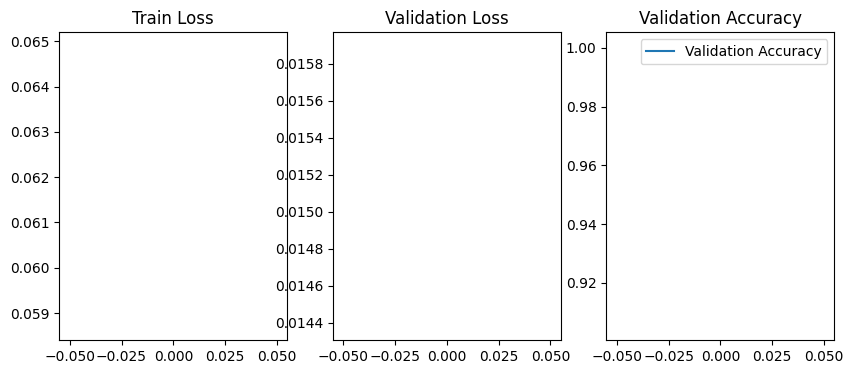

100%|██████████| 1247/1247 [01:28<00:00, 14.12batch/s, loss=0.00673]


Train loss: 0.018669893965125084
=> Saving checkpoint: 
/content/drive/MyDrive/Colab Notebooks/Deep Learning Arnaud Pietrosemoli/HorizonSegmentation/Save/my_checkpoint.pth.tar
Val loss: 0.01930102796653271
Got 446714220/117800960 with acc 3.79%
Dice score: 0.9513798356056213


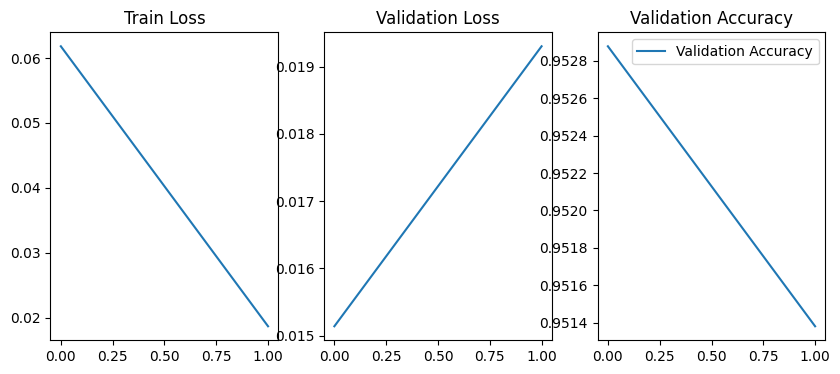

100%|██████████| 1247/1247 [01:28<00:00, 14.16batch/s, loss=0.0073]


Train loss: 0.016611821949481964
=> Saving checkpoint: 
/content/drive/MyDrive/Colab Notebooks/Deep Learning Arnaud Pietrosemoli/HorizonSegmentation/Save/my_checkpoint.pth.tar
Val loss: 0.015654500765266005
Got 447562578/117800960 with acc 3.80%
Dice score: 0.9529592990875244


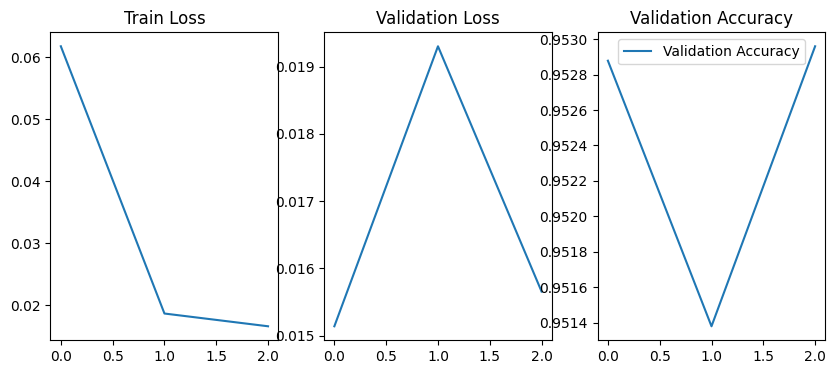

100%|██████████| 1247/1247 [01:28<00:00, 14.14batch/s, loss=0.00804]


Train loss: 0.012111208401620388
=> Saving checkpoint: 
/content/drive/MyDrive/Colab Notebooks/Deep Learning Arnaud Pietrosemoli/HorizonSegmentation/Save/my_checkpoint.pth.tar
Val loss: 0.17795484864854308
Got 436790615/117800960 with acc 3.71%
Dice score: 0.9324773550033569


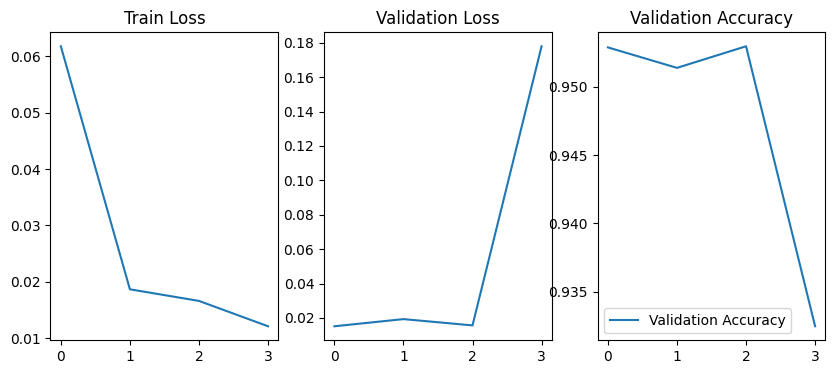

100%|██████████| 1247/1247 [01:29<00:00, 13.94batch/s, loss=0.00542]


Train loss: 0.013836280442774296
=> Saving checkpoint: 
/content/drive/MyDrive/Colab Notebooks/Deep Learning Arnaud Pietrosemoli/HorizonSegmentation/Save/my_checkpoint.pth.tar
Val loss: 0.009553782081177605
Got 448169753/117800960 with acc 3.80%
Dice score: 0.9542426466941833


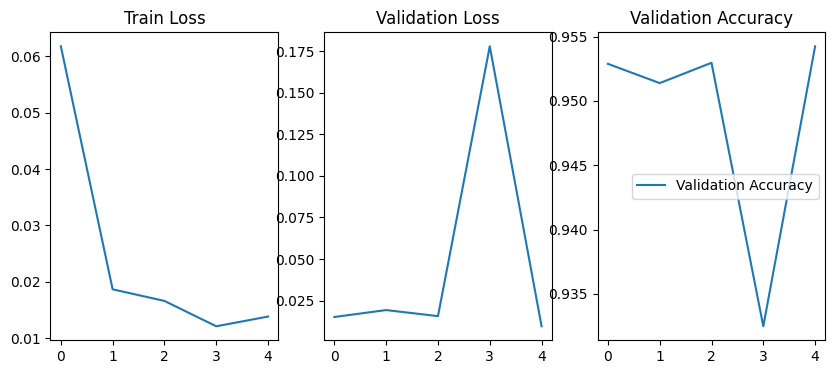

100%|██████████| 1247/1247 [01:29<00:00, 13.87batch/s, loss=0.00619]


Train loss: 0.010533729568123817
=> Saving checkpoint: 
/content/drive/MyDrive/Colab Notebooks/Deep Learning Arnaud Pietrosemoli/HorizonSegmentation/Save/my_checkpoint.pth.tar
Val loss: 0.00744999573826044
Got 448316030/117800960 with acc 3.81%
Dice score: 0.9545804858207703


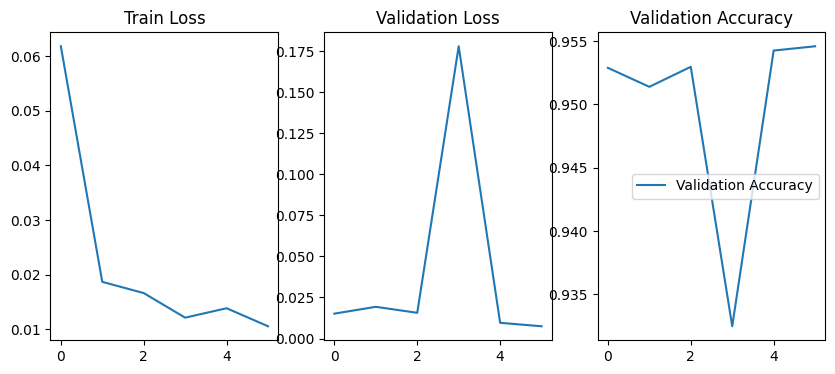

100%|██████████| 1247/1247 [01:30<00:00, 13.81batch/s, loss=0.00412]


Train loss: 0.009647976607084274
=> Saving checkpoint: 
/content/drive/MyDrive/Colab Notebooks/Deep Learning Arnaud Pietrosemoli/HorizonSegmentation/Save/my_checkpoint.pth.tar
Val loss: 0.015739502373863182
Got 447313928/117800960 with acc 3.80%
Dice score: 0.9526000022888184


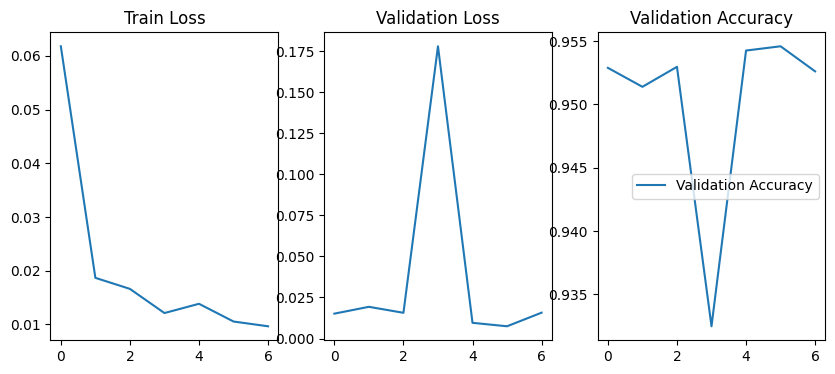

100%|██████████| 1247/1247 [01:30<00:00, 13.78batch/s, loss=0.00459]


Train loss: 0.009737096726894379
=> Saving checkpoint: 
/content/drive/MyDrive/Colab Notebooks/Deep Learning Arnaud Pietrosemoli/HorizonSegmentation/Save/my_checkpoint.pth.tar
Val loss: 0.007551784478350686
Got 448310496/117800960 with acc 3.81%
Dice score: 0.954541802406311


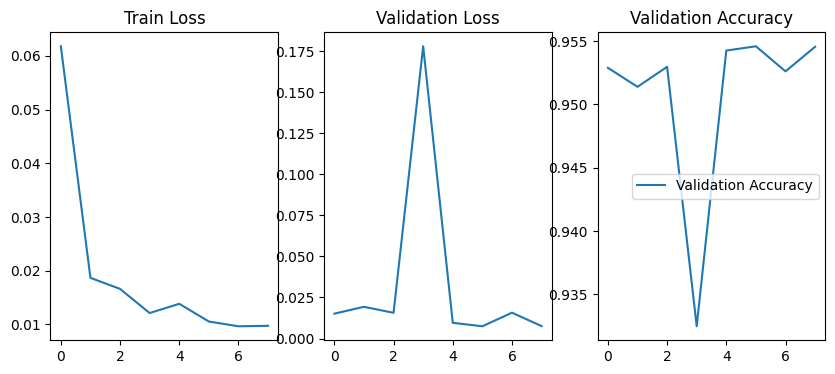

100%|██████████| 1247/1247 [01:32<00:00, 13.54batch/s, loss=0.00368]


Train loss: 0.008631240576505661
=> Saving checkpoint: 
/content/drive/MyDrive/Colab Notebooks/Deep Learning Arnaud Pietrosemoli/HorizonSegmentation/Save/my_checkpoint.pth.tar
Val loss: 0.00829956910777029
Got 448138915/117800960 with acc 3.80%
Dice score: 0.9541407823562622


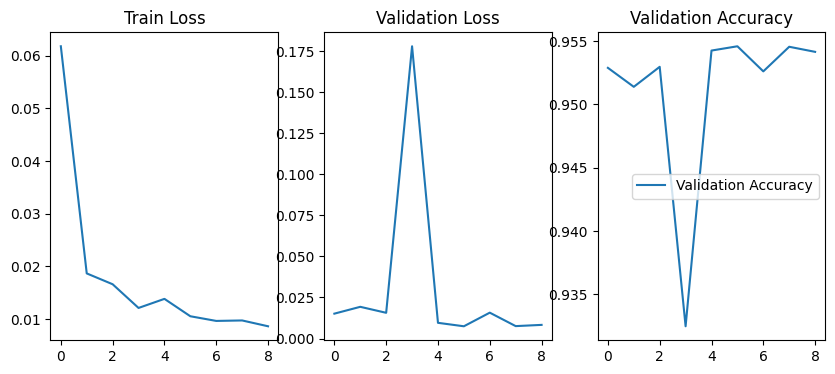

100%|██████████| 1247/1247 [01:32<00:00, 13.42batch/s, loss=0.0089]


Train loss: 0.009337234310805798
=> Saving checkpoint: 
/content/drive/MyDrive/Colab Notebooks/Deep Learning Arnaud Pietrosemoli/HorizonSegmentation/Save/my_checkpoint.pth.tar
Val loss: 0.007392475946088455
Got 448318084/117800960 with acc 3.81%
Dice score: 0.9545541405677795


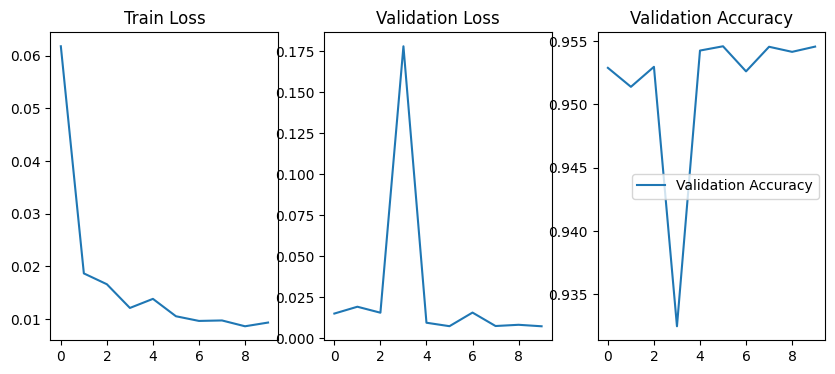

UNET(
  (ups): ModuleList(
    (0): ConvTranspose2d(1024, 512, kernel_size=(2, 2), stride=(2, 2))
    (1): DoubleConv(
      (conv): Sequential(
        (0): Conv2d(1024, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (1): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): ReLU(inplace=True)
        (3): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (4): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (5): ReLU(inplace=True)
      )
    )
    (2): ConvTranspose2d(512, 256, kernel_size=(2, 2), stride=(2, 2))
    (3): DoubleConv(
      (conv): Sequential(
        (0): Conv2d(512, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (1): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): ReLU(inplace=True)
        (3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (4): BatchNor

In [ ]:

# Define hyperparameters with the corrected class
hyper_parameters = HyperParameters(learning_rate=1e-4, batch_size=4, epoch_numbers=10, device="cuda")

# Run the training function
run_training(hyper_parameters)


# Evaluation

=> Loading checkpoint


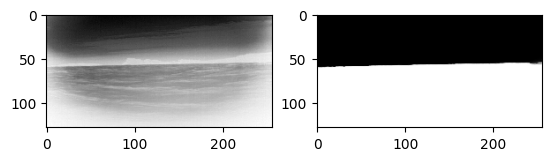

In [ ]:
# Initialize the model
model = UNET(in_channels=3, out_channels=1).to(device=DEVICE)

# Load the checkpoint
checkpoint = torch.load(CHECKPOINT_PATH, weights_only=True)
load_checkpoint(checkpoint, model)

# Validation transformations
val_transforms = A.Compose(
    [
        A.Resize(height=IMAGE_HEIGHT, width=IMAGE_WIDTH),
        A.Normalize(mean=[0.0], std=[1.0], max_pixel_value=255.0),
        ToTensorV2(),
    ]
)

# Validation dataset and loader
val_ds = HorizonDataset(
    image_dir=VAL_IMG_DIR,
    mask_dir=VAL_MASK_DIR,
    transform=val_transforms,
)
val_loader = DataLoader(
    val_ds,
    batch_size=4,
    num_workers=2,
    pin_memory=True,
    shuffle=False,
)

# Get a batch of validation images and masks
val_images, val_masks = next(iter(val_loader))

# Move images to the appropriate device and get predictions
data = val_images.to(device=DEVICE)
with torch.no_grad():
    y = model(data)

# Apply sigmoid activation and convert predictions to NumPy
preds = torch.sigmoid(y).cpu().numpy()

# Visualize the input image and its predicted mask
f = plt.figure()
f.add_subplot(1, 2, 1)
plt.imshow(val_images[1][0].cpu().numpy(), cmap="gray")  # Input image
f.add_subplot(1, 2, 2)
plt.imshow(preds[1][0], cmap="gray")  # Predicted mask
plt.show(block=True)